# Tipping in a Restaurant: Dataset 
## 1. Overview

The dataset being analyzed below is about tipping in a restaurant. One waiter collected information about the tips he received during his work shifts over a period of months. The variables he recorded are as follows:

* **total_bill** : the cost of the meal in dollars
* **tip** : tips received in dollars
* **sex** : sex of the bill payer
* **smoker** : whether the party was in the smoking section or not
* **day** : day of the week
* **time** : time of the day
* **size** : size of the party

In total the waiter recorded information about 244 tips. In this notebook, we will analyze the data in the cvs file for restaurant tipping and replicate the four plots shown in the [Wikipedia article](https://en.wikipedia.org/wiki/Exploratory_data_analysis). 

What we would like to learn from this dataset: which factors affect tipping behaviour?

## 2. Descriptive Data Analysis

## Loading in the data

In [1]:
# Importing libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('tips.csv', index_col=0) 
print(data)

     total_bill   tip     sex smoker   day    time  size
1         16.99  1.01  Female     No   Sun  Dinner     2
2         10.34  1.66    Male     No   Sun  Dinner     3
3         21.01  3.50    Male     No   Sun  Dinner     3
4         23.68  3.31    Male     No   Sun  Dinner     2
5         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
240       29.03  5.92    Male     No   Sat  Dinner     3
241       27.18  2.00  Female    Yes   Sat  Dinner     2
242       22.67  2.00    Male    Yes   Sat  Dinner     2
243       17.82  1.75    Male     No   Sat  Dinner     2
244       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [2]:
# Use the DataFrame.info() method to find out more about a dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [3]:
# Alternatively, checking the number of missing values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
# The DataFrame.columns variable stores information about the dataframe’s columns
print(data.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


## Data Types

In [5]:
print("The dtypes in the dataframe are:", end='\n\n')
print(data.dtypes) # the data types attributes for each column in df
# df.dtypes.value_counts() # how many variables of each type in the dataset 

The dtypes in the dataframe are:

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [6]:
data.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

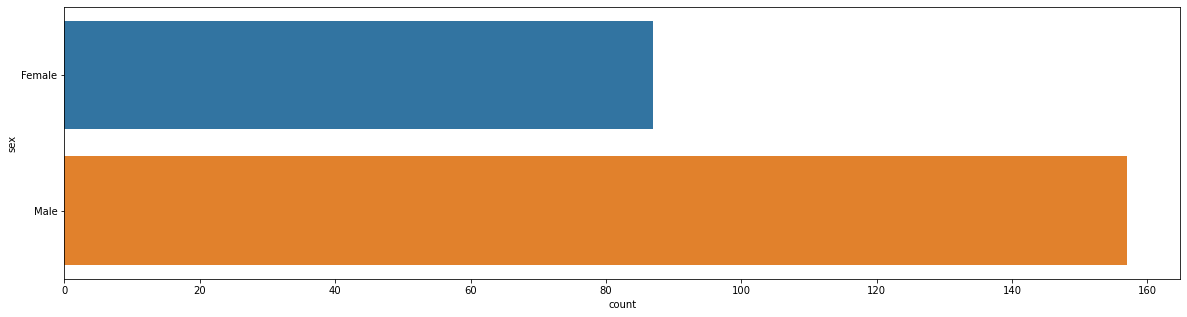

In [7]:
# View the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="sex", data=data);

In [8]:
data.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

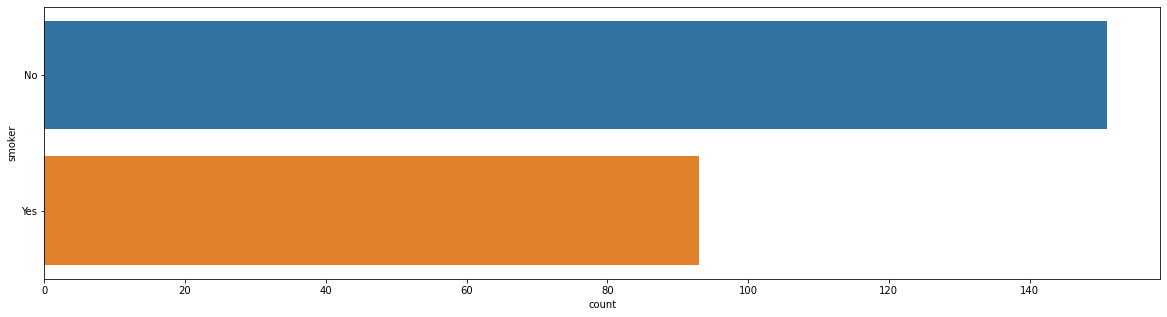

In [9]:
# View the distribution of smoker
plt.figure(figsize=(20, 5))
sns.countplot(y="smoker", data=data);

In [10]:
data.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

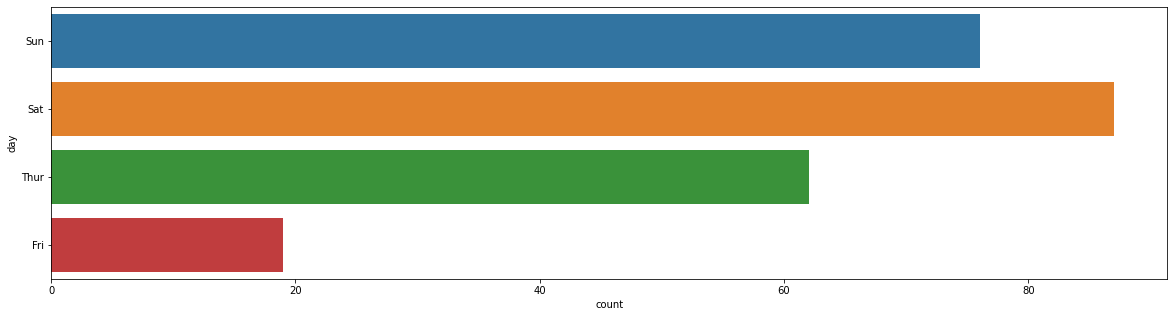

In [11]:
# View the distribution of day
plt.figure(figsize=(20, 5))
sns.countplot(y="day", data=data);

In [12]:
data.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

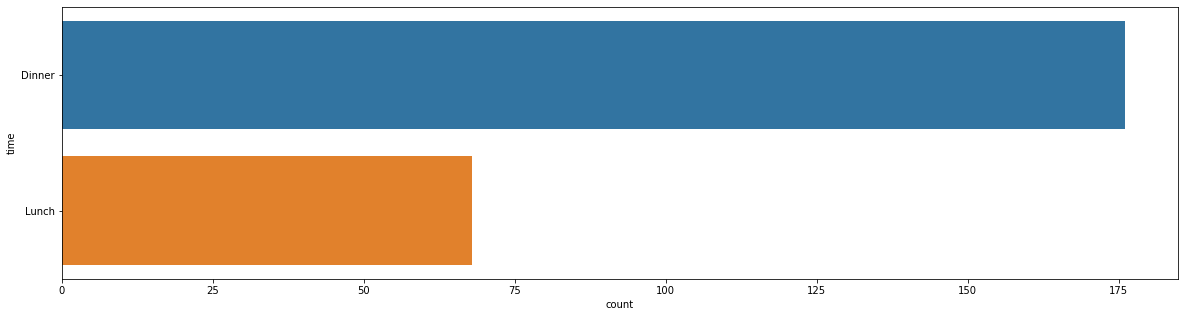

In [13]:
# View the distribution of time
plt.figure(figsize=(20, 5))
sns.countplot(y="time", data=data);

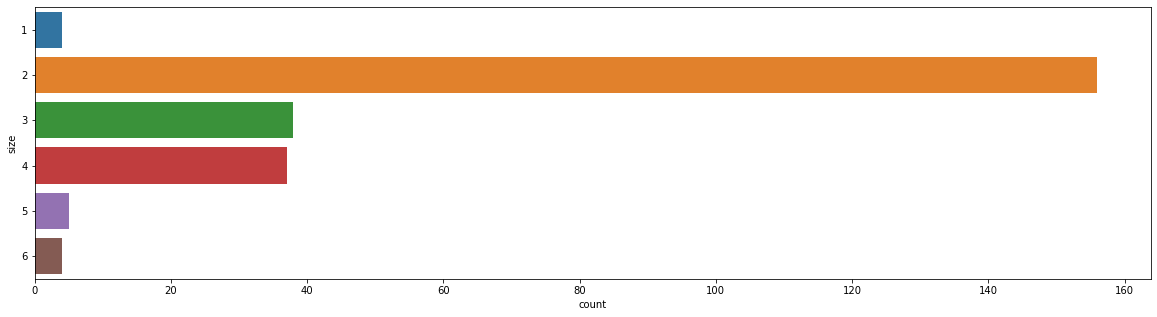

In [24]:
# View the distribution of size
plt.figure(figsize=(20, 5))
sns.countplot(y="size", data=data);

In the tipping dataset, there are 3 numerical variables and 4 non-numerical variables. Variables total_bill and tip are both floating point numbers representing dollar values, while size is an integer representing the size of the party being served.
The remaining variables sex, smoker, day and time are object variables. 

* sex: nominal (values are Male and Female)
* smoker: nominal (values are Yes and No)
* day: nominal (the values are Thur, Fri, Sat, Sun)
* time: nominal (the values are Dinner and Lunch)
* size: ordinal (discrete numerical values are 1-6)
* total_bill: ratio
* tip: ratio

New variable we will be introducing: tip rate = tip/total_bill
* tip_rate: ratio

## Descriptive Statistics

In [14]:
# DataFrame.describe() gets the summary statistics of only the columns that have numerical data.
print(data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [15]:
data['tip']

1      1.01
2      1.66
3      3.50
4      3.31
5      3.61
       ... 
240    5.92
241    2.00
242    2.00
243    1.75
244    3.00
Name: tip, Length: 244, dtype: float64

In [16]:
data['tip'].mean()

2.9982786885245902

## New feature: tip_rate

In [17]:
# calculating tip_rate variable
tip_rate = data['tip']/data['total_bill']
tip_rate

1      0.059447
2      0.160542
3      0.166587
4      0.139780
5      0.146808
         ...   
240    0.203927
241    0.073584
242    0.088222
243    0.098204
244    0.159744
Length: 244, dtype: float64

In [68]:
# assigning a new feature tip_rate and adding it to the dataset
newdata = data.assign(tip_rate = data['tip']/data['total_bill'])
print(newdata)

     total_bill   tip     sex smoker   day    time  size  tip_rate
1         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
2         10.34  1.66    Male     No   Sun  Dinner     3  0.160542
3         21.01  3.50    Male     No   Sun  Dinner     3  0.166587
4         23.68  3.31    Male     No   Sun  Dinner     2  0.139780
5         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
..          ...   ...     ...    ...   ...     ...   ...       ...
240       29.03  5.92    Male     No   Sat  Dinner     3  0.203927
241       27.18  2.00  Female    Yes   Sat  Dinner     2  0.073584
242       22.67  2.00    Male    Yes   Sat  Dinner     2  0.088222
243       17.82  1.75    Male     No   Sat  Dinner     2  0.098204
244       18.78  3.00  Female     No  Thur  Dinner     2  0.159744

[244 rows x 8 columns]


In [70]:
# DataFrame.describe() gets the summary statistics 
print(newdata.describe())

       total_bill         tip        size    tip_rate
count  244.000000  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672    0.160803
std      8.902412    1.383638    0.951100    0.061072
min      3.070000    1.000000    1.000000    0.035638
25%     13.347500    2.000000    2.000000    0.129127
50%     17.795000    2.900000    2.000000    0.154770
75%     24.127500    3.562500    3.000000    0.191475
max     50.810000   10.000000    6.000000    0.710345


## 3. Plotting

## Histogram of Tip Amounts with $1 bin width

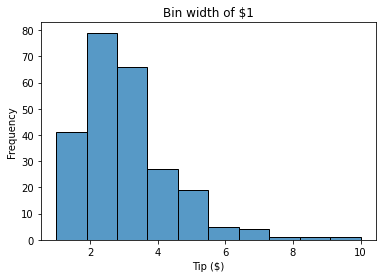

In [19]:
sns.histplot(x="tip", data=data, weights=1, bins = 10)
plt.xlabel('Tip ($)')
plt.ylabel('Frequency')
plt.title('Bin width of $1', fontsize=12);

The graph shows a unimodal distribution with one clear peak around the $2 value. Few people tip less than this amount. Beyond this value, the frequency of larger tips descreases rapidly thereby suggesting that the total bill amounts recorded by the waiter are low. 

## Histogram of Tip Amounts with 10c bin width

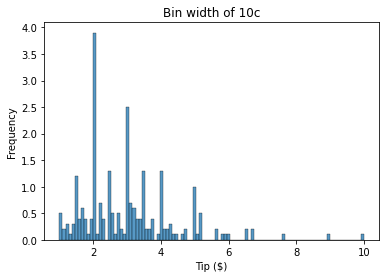

In [20]:
sns.histplot(x="tip", data=data, weights=0.1, bins = 100);
plt.xlabel('Tip ($)')
plt.ylabel('Frequency')
plt.title('Bin width of 10c', fontsize=12);

When we change the witdh of the bins to 10c, we see a multimodal distribution, with peaks at every 50c and full dollar value.
This suggests that patrons tend to round their tips to the next fifty cent or dollar value.

## Scatter Plot of Tips and Total Bills

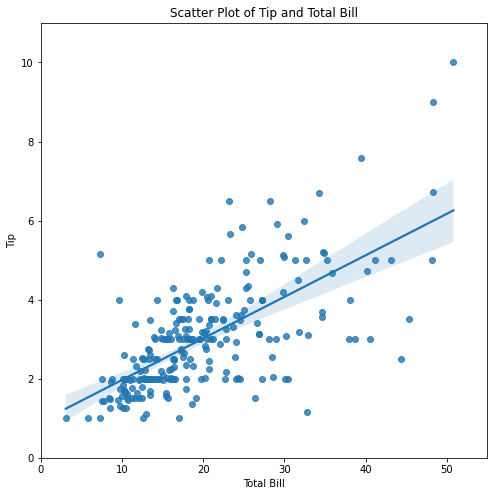

In [67]:
plt.figure(figsize=(8, 8))
sns.regplot(x="total_bill", y="tip", data=data)
plt.xlim(0, 55)
plt.ylim(0, 11)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tip and Total Bill', fontsize=12);

From the scatterplot above, we can observe a strong positive correlation between tips and total_bill, which is expected given that patrons tip a certain percentage of the total bill amount. 

In the scatter plot below, we add a line representing an 18% tip to recreate the one from the Wikipedia article.
Looking at the result, we see that most data points fall below the line, suggesting that most patrons tip under the 18% rate. 

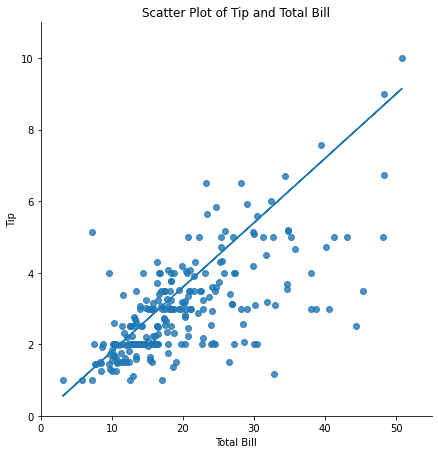

In [64]:
g = sns.lmplot(x="total_bill", y="tip", data=data, height=6, fit_reg=False)
plt.xlim(0, 55)
plt.ylim(0, 11)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Tip and Total Bill', fontsize=12)

for ax in g.axes.flat:
    x = g.data.total_bill
    y = 0.18*x
    ax.plot(x, y);

## Scatter Plot of Tips, Total Bills, Smoker and Sex

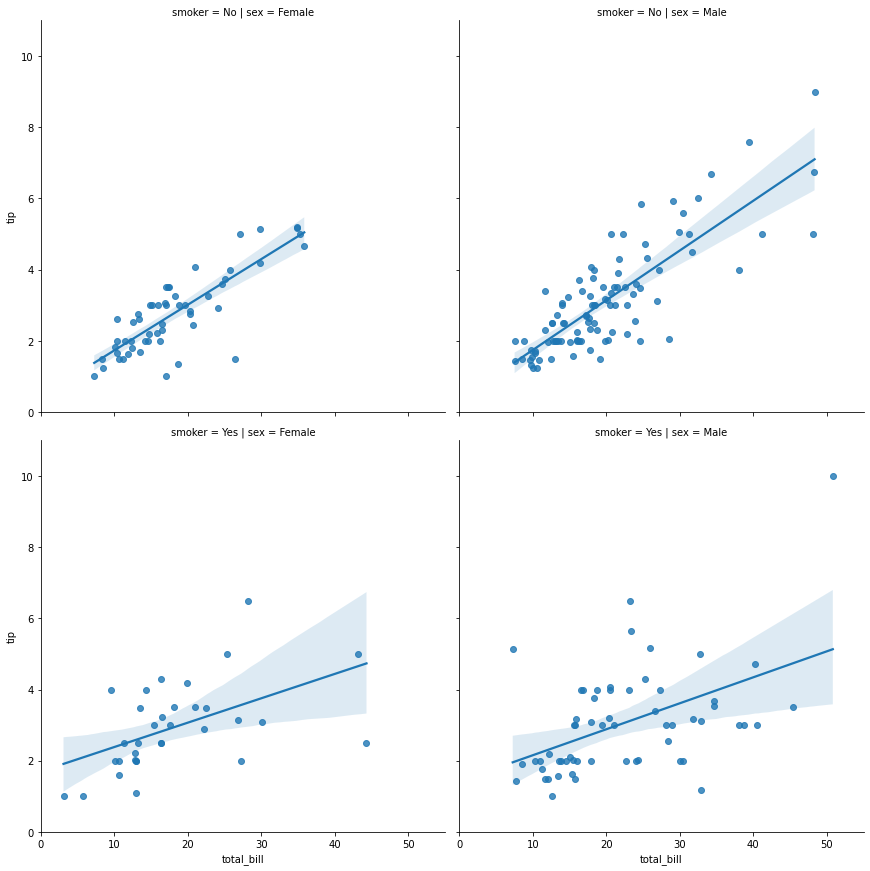

In [55]:
g = sns.lmplot(x="total_bill", y="tip", row="smoker", col="sex", data=data, height=6)
plt.xlim(0, 55)
plt.ylim(0, 11);

In this scatter plot, we add the variables smoker and sex to see their relationship with variables tip and total bill. The data is displayed in four plots to illustrate results for different values of smoker (yes, no) and sex (male, female). 

We can observe a strong positive correlation between total_bill and tip for female non-smokers, suggesting that they consistently tipped as a percentage of their bill. 

This correlation appears to be significantly weaker for both men and women who smoke.

We can also observe that there were more male patrons paying the total bill and also paying the highest total bills amounts. 

Once again, we reproduce these plots with the 18% line below to replicate those shown in the Wikipedia article.

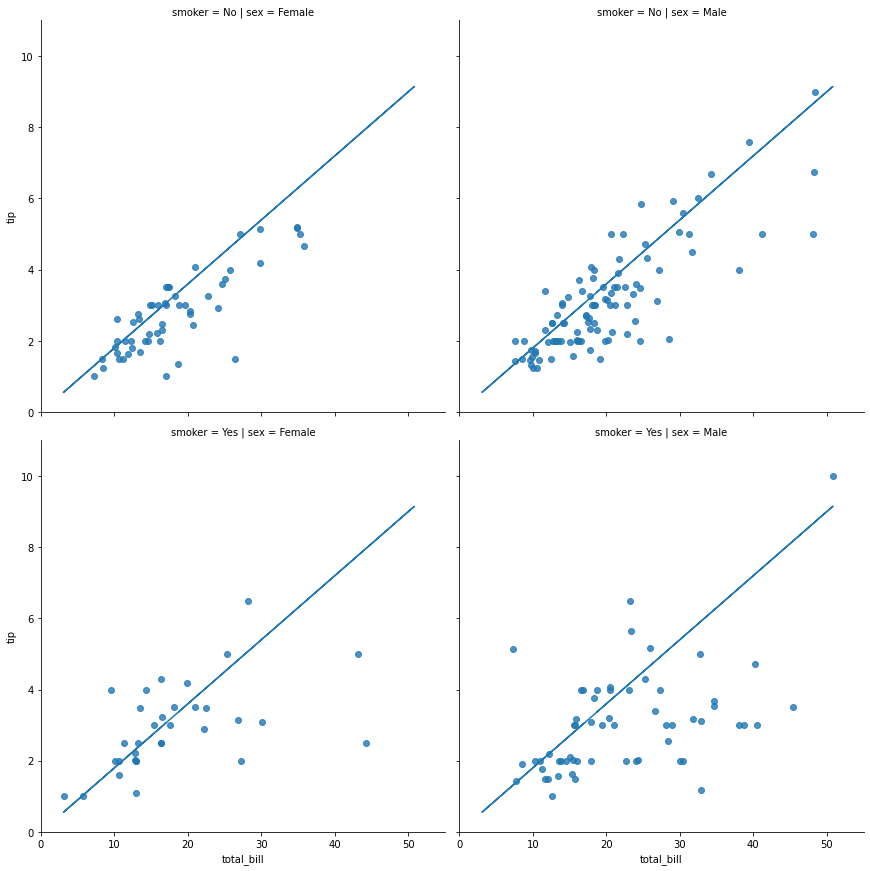

In [56]:
g = sns.lmplot(x="total_bill", y="tip", row="smoker", col="sex", data=data, height=6, fit_reg=False)
plt.xlim(0, 55)
plt.ylim(0, 11)

for ax in g.axes.flat:
    x = g.data.total_bill
    y = 0.18*x
    ax.plot(x, y);